In [68]:
import pandas as pd
import pickle as pkl
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

from pytorch_transformers import BertTokenizer, BertForMaskedLM, BertForSequenceClassification, BertConfig
from util import *

# get gt based on sst labels

In [2]:
sents_arr = np.loadtxt('data/sentiment_labels.txt', dtype=str, delimiter='|')
id_to_sent = {sents_arr[i, 0]: float(sents_arr[i, 1]) for i in range(1, sents_arr.shape[0])}

phrases = open('data/dictionary.txt', 'r').read().split('\n') #[:10000]
phrase_to_id = {}
for line in phrases:
    try:
        s, phrase_id = line.split('|')
        if all([c.isalpha() for c in s]):
            phrase_to_id[s.lower()] = phrase_id
    except:
        pass
    
phrase_to_sent = {
    phrase: id_to_sent[phrase_to_id[phrase]] for phrase in phrase_to_id if phrase_to_id[phrase] in id_to_sent
}

In [69]:
scores = pkl.load(open('scores_0.pkl', 'rb'))
ks = list(set(scores['iid'].keys()).intersection(set(phrase_to_sent.keys())))
results['word'] = ks

results = {
    key: [np.mean(scores[key][k]) for k in ks] for key in scores.keys()
}

In [78]:
r = pd.DataFrame.from_dict(results)

In [80]:
r

,iid,conditional,remove
0,-0.009029,-0.003179,0.000144
1,-0.000795,-0.003416,-0.000791
2,-0.000529,-0.000439,0.000102
3,-0.027911,-0.003067,-0.004284
4,-0.004628,-0.002920,-0.002530
5,-0.008319,-0.007937,-0.003152


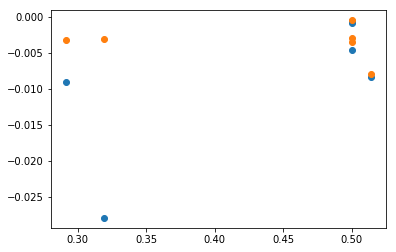

In [73]:
plt.plot(results['gt'], results['contrib-iid'], 'o', label='iid')
plt.plot(results['gt'], results['contrib-cond'], 'o', label='conditional')
plt.plot(results['gt'], results['contrib-cond'], 'o', label='conditional')

In [ ]:
print(f'{spearmanr(s})